In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\AP\Desktop\StudentsPerformance.csv')

In [ ]:
df.head(2)

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df['math score'].value_counts()

65    36
62    35
59    32
69    32
73    27
61    27
67    26
63    26
68    26
71    26
58    25
74    25
77    24
53    24
66    24
81    22
79    22
75    21
76    21
64    20
82    18
70    18
54    18
55    18
57    18
52    18
72    18
49    17
80    17
60    16
      ..
97     6
42     6
41     6
89     6
35     5
43     5
37     4
93     4
39     4
29     3
32     3
99     3
38     3
98     3
96     3
30     2
36     2
95     2
27     2
34     2
33     1
28     1
26     1
24     1
23     1
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

---------------------------
1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

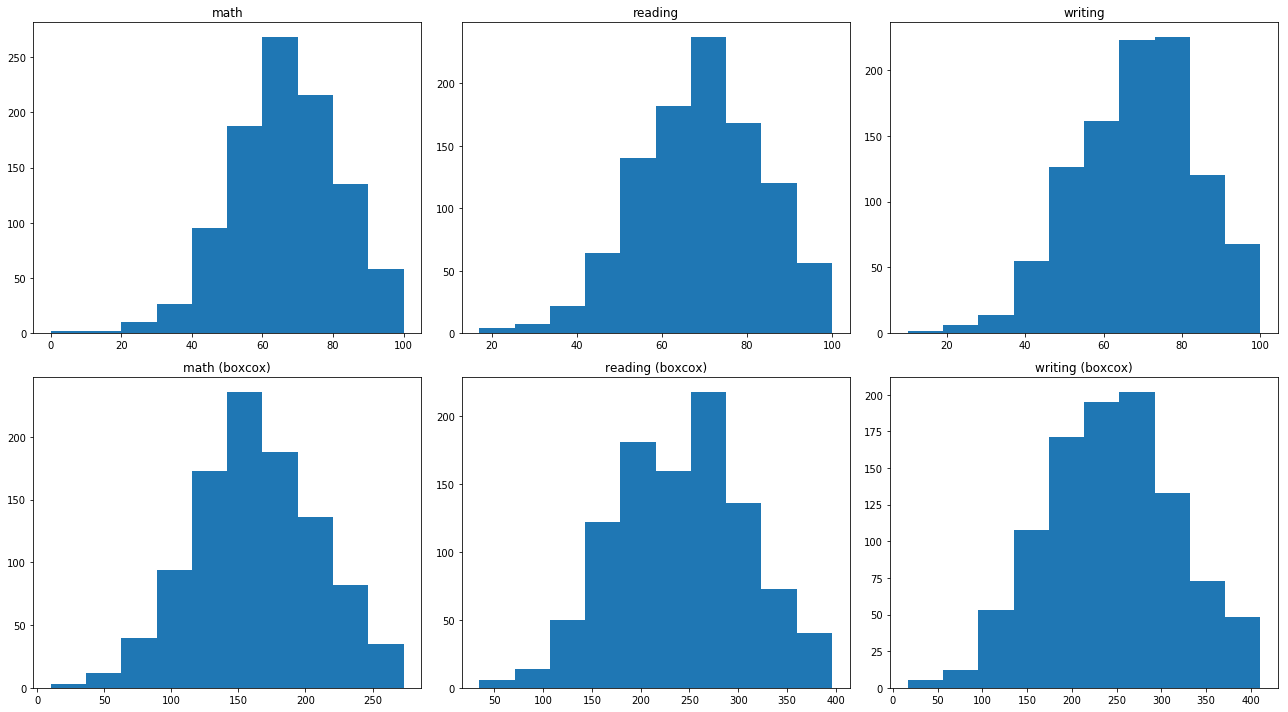

In [8]:
from scipy.stats import boxcox

# math score contains one zero, will drop (boxcox requires positive numbers)

math_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,10))

# histograms of distributions

plt.subplot(2,3,1)
plt.hist(df["math score"])
plt.title("math")

plt.subplot(2,3,2)
plt.hist(df["reading score"])
plt.title("reading")

plt.subplot(2,3,3)
plt.hist(df["writing score"])
plt.title("writing")

# histograms after boxcox

plt.subplot(2,3,4)
plt.hist(math_boxcox)
plt.title("math (boxcox)")

plt.subplot(2,3,5)
plt.hist(reading_boxcox)
plt.title("reading (boxcox)")

plt.subplot(2,3,6)
plt.hist(writing_boxcox)
plt.title("writing (boxcox)")

plt.tight_layout()
plt.show()

The distributions appear to be normally distributed. Let's confirm with JB test.

In [9]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# JB test

jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Math JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))
print("Math Norm test stat: {0} /// p value: {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Reading JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))
print("Reading Norm test stat: {0} /// p value: {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Writing JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))
print("Writing Norm test stat: {0} /// p value: {1}".format(norm_stats[0], norm_stats[1]))

Math JB test stat: 15.912256686712709 /// p value: 0.0003505075386818213
Math Norm test stat: 15.408960513931822 /// p value: 0.00045080293869937836
Reading JB test stat: 11.383300575987892 /// p value: 0.0033740202672214448
Reading Norm test stat: 11.11741279628622 /// p value: 0.003853758403576582
Writing JB test stat: 13.98509448257235 /// p value: 0.0009187033894586527
Writing Norm test stat: 13.606450837263859 /// p value: 0.0011101885439899974


All of the p-values are well under the significance level of 0.05, confirming distributions are normal.

In [10]:
# boxcox JB test

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Math JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))
print("Math Norm test stat: {0} /// p value: {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Reading JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))
print("Reading Norm test stat: {0} /// p value: {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Writing JB test stat: {0} /// p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Writing Norm test stat: {0} /// p value is {1}".format(norm_stats[0], norm_stats[1]))

Math JB test stat: 1.7200980667409385 /// p value: 0.4231413337632879
Math Norm test stat: 1.8323072783414356 /// p value: 0.40005484084042864
Reading JB test stat: 4.119778575331906 /// p value: 0.1274680814024559
Reading Norm test stat: 5.282274611852865 /// p value: 0.07128015609575467
Writing JB test stat: 4.746478090040098 /// p value is 0.09317842784055597
Writing Norm test stat: 6.267311355043339 /// p value is 0.04355827085023795


Applying the boxcox brings the distribution further away from normal.

------------------------------
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

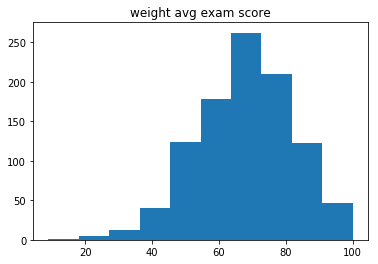

JB test stat: 15.453387913085164 /// p value is 0.00044089934264401887
Norm test stat: 15.186721327231322 /// p value is 0.0005037851534494478


In [14]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# weighted avg score

weight_score = (df["math score"] +
              df["reading score"] + df["writing score"])/3

# histogram weighted avg score

plt.hist(weight_score)
plt.title("weight avg exam score")

plt.show()

# JB and norm test

jb_stats = jarque_bera(weight_score)
norm_stats = normaltest(weight_score)

print("JB test stat: {0} /// p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Norm test stat: {0} /// p value is {1}".format(norm_stats[0], norm_stats[1]))

Weighted avg distribution is normal.

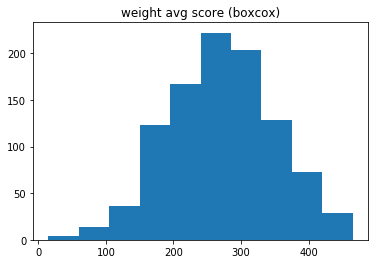

JB test stat: 2.4353987431906026 /// p value is 0.29591016374203183
Norm test stat: 2.779857245981238 /// p value is 0.2490930835165177


In [15]:
weight_boxcox,_ = boxcox(weight_score)

# histogram exam score boxcox

plt.hist(weight_boxcox)
plt.title("weight avg score (boxcox)")

plt.show()

# JB and norm test

jb_stats = jarque_bera(weight_boxcox)
norm_stats = normaltest(weight_boxcox)

print("JB test stat: {0} /// p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Norm test stat: {0} /// p value is {1}".format(norm_stats[0], norm_stats[1]))

The weighted avg score is not normally distributed. JB test confirms this p-value exceeds significance level of 0.05. Applying boxcox to weighted avg brought the distribution away from normality.

----------------------------------

3. Which variables seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

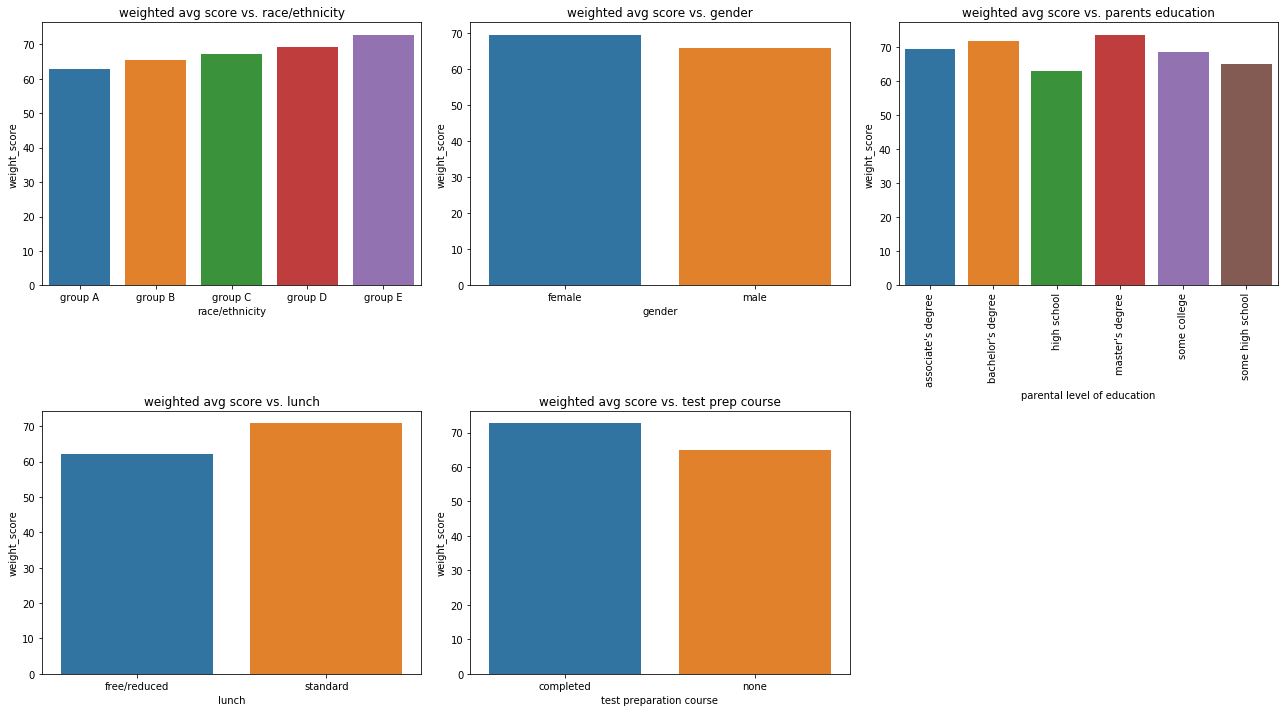

In [16]:
df["weight_score"] = weight_score

# histograms weighted avg score vs. single variables

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.barplot(df.groupby("race/ethnicity")
        ["weight_score"].mean().index, df.groupby("race/ethnicity")["weight_score"].mean())
plt.title("weighted avg score vs. race/ethnicity")

plt.subplot(2, 3, 2)
sns.barplot(df.groupby("gender")["weight_score"].mean().index, df.groupby("gender")["weight_score"].mean())
plt.title("weighted avg score vs. gender")

plt.subplot(2, 3, 3)
sns.barplot(df.groupby("parental level of education")["weight_score"].mean().index,
            df.groupby("parental level of education")["weight_score"].mean())
plt.title("weighted avg score vs. parents education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
sns.barplot(df.groupby("lunch")["weight_score"].mean().index, df.groupby("lunch")["weight_score"].mean())
plt.title("weighted avg score vs. lunch")

plt.subplot(2, 3, 5)
sns.barplot(df.groupby("test preparation course")["weight_score"].mean().index, 
            df.groupby("test preparation course")["weight_score"].mean())
plt.title("weighted avg score vs. test prep course")

plt.tight_layout()
plt.show()

* There appears to be a uniform increase in scores from group A to group E concerning race/ethnicity. A more detailed look at this category might provide some insight.

* On avg, females perform better on the exams than males.

* There seems to be a correlation between high parental education and increased exam scores. It's interesting that kids whose parents completed some high school do better on avg than kids from parents who completed high school. Could be random, take a closer look.

* Kids who get standard lunch score better on avg than kids who receive a free/reduced lunch. This is probably not directly related to the kind of lunch each receive, but possibly an overall economically challenged environment.

* Reasonably so, kids who complete the test prep course score higher on avg than kids who do not complete it. 

Without further statistical testing, the two main variables that appear to make the biggest difference in avg test scores are lunch type and completing the test prep course. This will require further testing to confirm. However, I believe lunch type indicates an overall econonically disadvantaged situation, and not necessarily the physical contents of their lunch each day. 